## Main file

`RadarSimPy` used in this example is version: 12.4.0


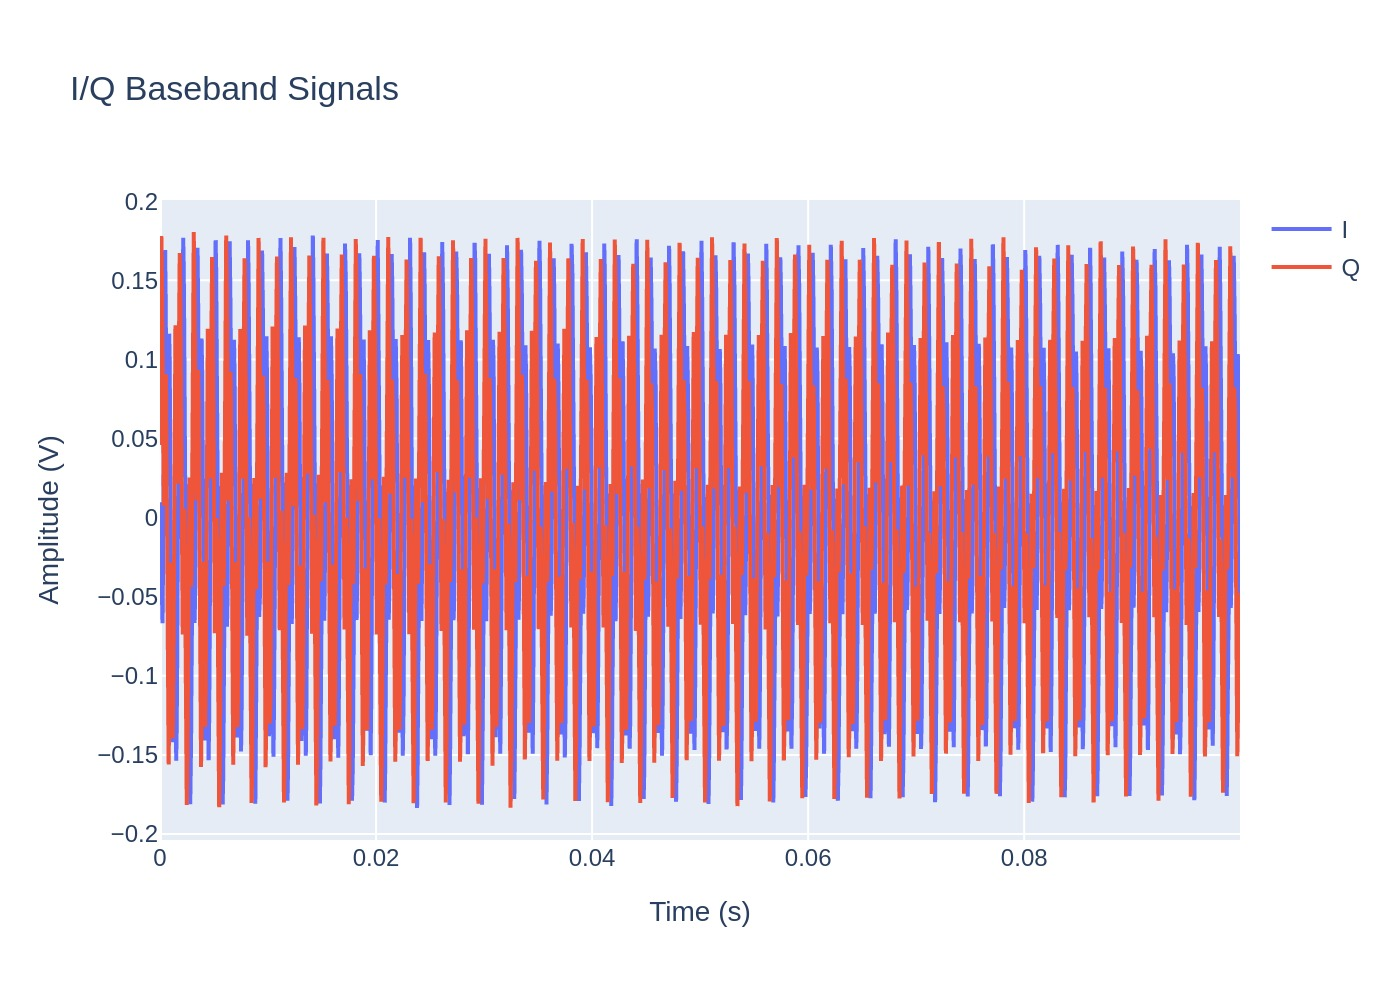

In [17]:
import radarsimpy
import numpy as np
from radarsimpy import Radar, Transmitter, Receiver
from radarsimpy.simulator import sim_radar
import plotly.graph_objs as go
from IPython.display import Image

print("`RadarSimPy` used in this example is version: " + str(radarsimpy.__version__))

# Transmitter
tx = Transmitter(
    # f = carrier frequency in Hz, t = pulse width in seconds, tx_power = amplitude of the transmitted signal 
    f=10e9, t=0.1, tx_power=10, pulses=1, channels=[dict(location=(0, 0, 0))]
)

# Receiver
rx = Receiver(
    # fs = sampling frequency in Hz, noise_figure = noise figure in dB, rf_gain = ?
    fs=40000,
    noise_figure=6,
    rf_gain=20,
    baseband_gain=50,
    load_resistor=1000,
    channels=[dict(location=(0, 0, 0))],
)

# Radar
radar = Radar(transmitter=tx, receiver=rx)

target1 = dict(location=(30, 0, 0), rcs=20, speed=(-10, 0, 0), phase=0)
target2 = dict(location=(35, 0, 0), rcs=20, speed=(35, 0, 0), phase=0)
targets = [target1, target2]

# Simulate radar data
data = sim_radar(radar, targets)
timestamp = data["timestamp"]
baseband = data["baseband"] + data["noise"]


# Plot the radar data
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=timestamp[0, 0, :],
        y=np.real(baseband[0, 0, :]),
        name="I",
    )
)
fig.add_trace(
    go.Scatter(
        x=timestamp[0, 0, :],
        y=np.imag(baseband[0, 0, :]),
        name="Q",
    )
)

fig.update_layout(
    title="I/Q Baseband Signals",
    yaxis=dict(title="Amplitude (V)"),
    xaxis=dict(title="Time (s)"),
)

# uncomment this to display interactive plot
# fig.show()

# display static image to reduce size on radarsimx.com
img_bytes = fig.to_image(format="jpg", scale=2)
display(Image(img_bytes))

### Doppler Radar Signal Processing
We can use FFT to evaluate the frequency shifts introduced by the Doppler effect.

In [18]:
from scipy.fft import fft, fftshift
from scipy.constants import speed_of_light

spec = fftshift(fft(baseband[0, 0, :]))
speed = (
    np.linspace(
        -rx.bb_prop["fs"] / 2,
        rx.bb_prop["fs"] / 2,
        radar.sample_prop["samples_per_pulse"],
        endpoint=False,
    )
    * speed_of_light
    / 2
    / 10e9
)

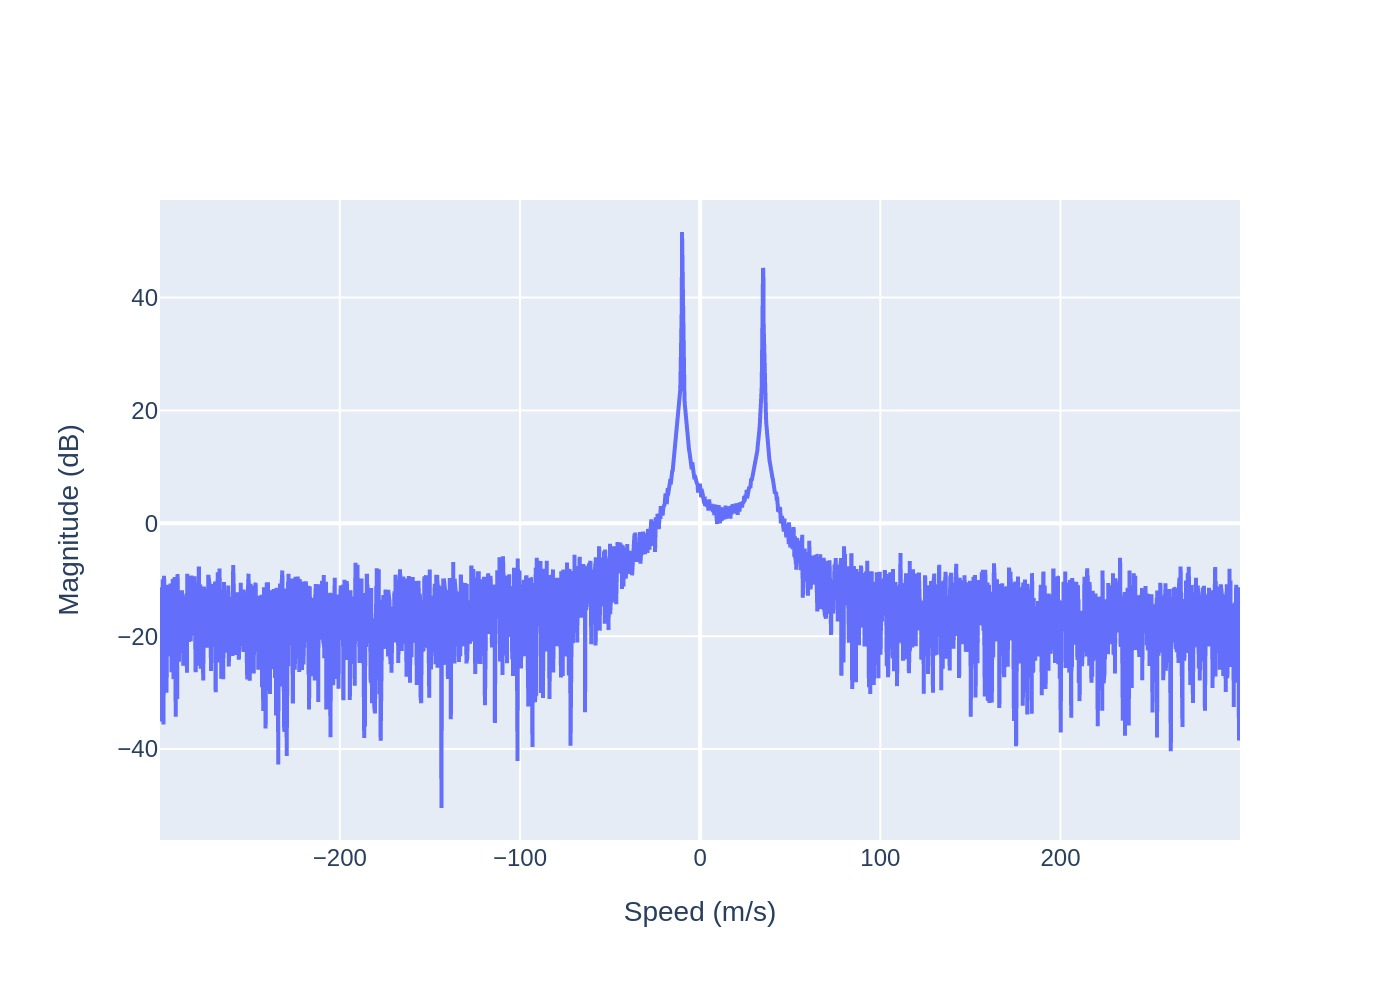

In [19]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=speed,
        y=20 * np.log10(np.abs(spec)),
    )
)
fig.update_layout(
    yaxis=dict(title="Magnitude (dB)"),
    xaxis=dict(title="Speed (m/s)"),
)

# uncomment this to display interactive plot
# fig.show()

# display static image to reduce size on radarsimx.com
img_bytes = fig.to_image(format="jpg", scale=2)
display(Image(img_bytes))
